In [100]:
import pandas as pd
import numpy as np
import seaborn as sns

# Vergleich für unterschiedliche imbalance degrees

Wir haben insgesamt 5 verschiede imbalance degrees, die wir im FOlgenden betrachten: very_low, low, normal, high und very_high.

## Normal Imbalance

Zunächst die Ergebnisse für normal imbalance, also die hardcoded Hierarchie ohne zusätzliche Änderungen.

In [120]:
normal_imb_df = pd.read_csv('result_split/gini_accuracy_all_runs.csv')
normal_imb_df["Method"] = normal_imb_df["Method"].apply(lambda x: "SPH+CPI" if x=="Tailored Approach" else x)
normal_imb_df

,R_e,A@e,Method,gini,p value,Run,SPH Executed,info loss,SPH A@1,RF+B A@1,CPI A@1,Avg Acc SPH+CPI
0,1,0.386667,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN
1,2,0.546667,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN
2,3,0.640000,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN
3,4,0.740000,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN
4,5,0.783333,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,6,0.776667,SPH+CPI,0.4,0.95,5.0,10.0,0.25,0.383333,0.336667,0.156667,0.719333
2496,7,0.800000,SPH+CPI,0.4,0.95,5.0,10.0,0.25,0.383333,0.336667,0.156667,0.719333
2497,8,0.823333,SPH+CPI,0.4,0.95,5.0,10.0,0.25,0.383333,0.336667,0.156667,0.719333
2498,9,0.833333,SPH+CPI,0.4,0.95,5.0,10.0,0.25,0.383333,0.336667,0.156667,0.719333


In [123]:
# get run and parameters with maximum average accuracy
#normal_imb_df["Method"]
best_result = normal_imb_df[normal_imb_df["Avg Acc SPH+CPI"] == normal_imb_df["Avg Acc SPH+CPI"].max()]
best_gini = best_result["gini"].values[0]
best_p = best_result["p value"].values[0]
best_run = best_result["Run"].values[0]

best_ta_methods = normal_imb_df[((normal_imb_df["gini"] ==best_gini) & (normal_imb_df["Run"] == best_run) & (normal_imb_df["p value"] == best_p))]
best_other_methods = normal_imb_df[(normal_imb_df["Run"] == best_run) & (normal_imb_df["gini"] == -1)]
best_all_methods = pd.concat([best_ta_methods, best_other_methods])
best_result

,R_e,A@e,Method,gini,p value,Run,SPH Executed,info loss,SPH A@1,RF+B A@1,CPI A@1,Avg Acc SPH+CPI
450,1,0.403333,SPH+CPI,0.4,0.85,1.0,8.0,0.25,0.386667,0.303333,0.293333,0.733333
451,2,0.573333,SPH+CPI,0.4,0.85,1.0,8.0,0.25,0.386667,0.303333,0.293333,0.733333
452,3,0.640000,SPH+CPI,0.4,0.85,1.0,8.0,0.25,0.386667,0.303333,0.293333,0.733333
453,4,0.736667,SPH+CPI,0.4,0.85,1.0,8.0,0.25,0.386667,0.303333,0.293333,0.733333
454,5,0.783333,SPH+CPI,0.4,0.85,1.0,8.0,0.25,0.386667,0.303333,0.293333,0.733333
455,6,0.810000,SPH+CPI,0.4,0.85,1.0,8.0,0.25,0.386667,0.303333,0.293333,0.733333
456,7,0.830000,SPH+CPI,0.4,0.85,1.0,8.0,0.25,0.386667,0.303333,0.293333,0.733333
457,8,0.833333,SPH+CPI,0.4,0.85,1.0,8.0,0.25,0.386667,0.303333,0.293333,0.733333
458,9,0.856667,SPH+CPI,0.4,0.85,1.0,8.0,0.25,0.386667,0.303333,0.293333,0.733333
459,10,0.866667,SPH+CPI,0.4,0.85,1.0,8.0,0.25,0.386667,0.303333,0.293333,0.733333


### Untersuchung von Einfluss Parameter und Runs

Zunächst untersuchen wir, was die besten Parameter und der beste Run ist und schauen uns das Ergebnis dafür an.

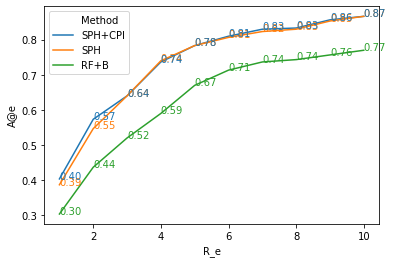

In [145]:
best_params = normal_imb_df[((normal_imb_df["gini"] == best_gini) & (normal_imb_df["p value"] == best_p)) | (normal_imb_df["gini"] ==-1)]
best_run_df = normal_imb_df[normal_imb_df["Run"] == best_run]
ax = sns.lineplot(x="R_e", y="A@e", data=best_all_methods, hue="Method")
write_values_lineplot(best_all_methods, ax)

Nun schauen wir uns für die besten Parameter an, wie die Ergebnisse über die verschiedenen Runs sind. Dabei sieht man, dass auch für unterschiedliche Runs (also train/test splits) die besten Parameter unterschiedliche Ergebnisse erzielen können. SPH+CPI und SPH sind nun ungefähr gleich auf, aber trotzdem beide noch deutlich besser als RF+B.

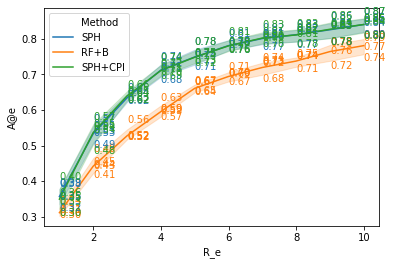

In [104]:
def write_values_lineplot(df, ax):
    palette = sns.color_palette()[0:5]
    color_per_label = {x:c for x,c in zip(df["Method"].unique(), palette)}

    for item, color in zip(df.groupby('Method'),palette):
        #item[1] is a grouped data frame
        for x,y,method in item[1][['R_e','A@e','Method']].values:
            y = np.mean(y)
            ax.text(x,y,f'{y:.2f}', color=color_per_label[method])
            
ax = sns.lineplot(x="R_e", y="A@e", data=best_params, hue="Method", markers=True)
write_values_lineplot(best_params, ax)

Und jetzt noch wie die Ergebnisse sind, wenn wir den gleichen Run nehmen, aber unterschiedliche Parameter. D.h. wie sich die Parameter auswirken können auf SPH+CPI. Hier sieht man nun, dass SPH+CPI nicht mehr besser ist als SPH (im median) und somit haben die Parameter einen starken Einfluss auf SPH+CPI, was wiederun heißt, dass die Parameteroptimierung schon wichtig ist.

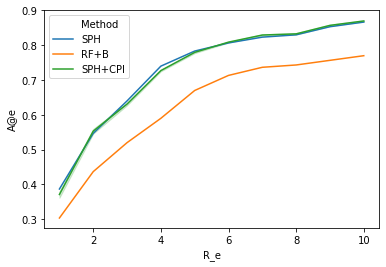

In [105]:
sns.lineplot(x="R_e", y="A@e", data=best_run_df, hue="Method")

## Beste Parameter von normal im Vergleich zu anderen Imbalance Degrees
Hier mergen wir alle Ergebnisse für very_low, low, normal, high und very_high und schauen uns die Ergebnisse an, wenn wir die besten Parameter für normal nehmen.

In [133]:
low_imb_df = pd.read_csv('imbalance_degree/low/result_split/gini_accuracy_all_runs.csv')
very_low_imb_df = pd.read_csv('imbalance_degree/very_low/result_split/gini_accuracy_all_runs.csv')
high_imb_df = pd.read_csv('imbalance_degree/high/result_split/gini_accuracy_all_runs.csv')
very_high_imb_df = pd.read_csv('imbalance_degree/very_high/result_split/gini_accuracy_all_runs.csv')


low_imb_df["imbalance"] = "low"
very_low_imb_df["imbalance"] = "very low"
normal_imb_df["imbalance"] = "normal"
high_imb_df["imbalance"] = "high"
very_high_imb_df["imbalance"] = "very high"
normal_imb_df

,R_e,A@e,Method,gini,p value,Run,SPH Executed,info loss,SPH A@1,RF+B A@1,CPI A@1,Avg Acc SPH+CPI,imbalance
0,1,0.386667,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN,normal
1,2,0.546667,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN,normal
2,3,0.640000,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN,normal
3,4,0.740000,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN,normal
4,5,0.783333,SPH,-1.0,-1.00,1.0,8.0,0.25,NaN,NaN,NaN,NaN,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,6,0.776667,SPH+CPI,0.4,0.95,5.0,10.0,0.25,0.383333,0.336667,0.156667,0.719333,normal
2496,7,0.800000,SPH+CPI,0.4,0.95,5.0,10.0,0.25,0.383333,0.336667,0.156667,0.719333,normal
2497,8,0.823333,SPH+CPI,0.4,0.95,5.0,10.0,0.25,0.383333,0.336667,0.156667,0.719333,normal
2498,9,0.833333,SPH+CPI,0.4,0.95,5.0,10.0,0.25,0.383333,0.336667,0.156667,0.719333,normal


Nun werden alle gemerged und nach den besten Parametern von normal gefiltert.

In [134]:
merged_df = pd.concat([low_imb_df, normal_imb_df, very_low_imb_df, high_imb_df, very_high_imb_df])

merged_df["Method"] = merged_df["Method"].apply(lambda x: "SPH+CPI" if x=="Tailored Approach" else x)

best_merged_df = merged_df[(merged_df["gini"] == best_gini) & (merged_df["p value"] == best_p)]
print(best_merged_df["imbalance"].unique())
best_merged_df

['low' 'normal' 'very low' 'high' 'very high']


,R_e,A@e,Method,gini,p value,Run,SPH Executed,info loss,SPH A@1,RF+B A@1,CPI A@1,Avg Acc SPH+CPI,imbalance
450,1,0.256667,SPH+CPI,0.4,0.85,1.0,8.0,0.25,0.236667,0.21,0.18,0.563667,low
451,2,0.386667,SPH+CPI,0.4,0.85,1.0,8.0,0.25,0.236667,0.21,0.18,0.563667,low
452,3,0.480000,SPH+CPI,0.4,0.85,1.0,8.0,0.25,0.236667,0.21,0.18,0.563667,low
453,4,0.553333,SPH+CPI,0.4,0.85,1.0,8.0,0.25,0.236667,0.21,0.18,0.563667,low
454,5,0.590000,SPH+CPI,0.4,0.85,1.0,8.0,0.25,0.236667,0.21,0.18,0.563667,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,6,0.746667,SPH+CPI,0.4,0.85,5.0,10.0,0.25,0.536667,0.48,0.46,0.700667,very high
2456,7,0.766667,SPH+CPI,0.4,0.85,5.0,10.0,0.25,0.536667,0.48,0.46,0.700667,very high
2457,8,0.773333,SPH+CPI,0.4,0.85,5.0,10.0,0.25,0.536667,0.48,0.46,0.700667,very high
2458,9,0.780000,SPH+CPI,0.4,0.85,5.0,10.0,0.25,0.536667,0.48,0.46,0.700667,very high


Ergbnis bzgl. Accuracy wird nun visualisiert.
Man sieht, dass mit steigern imabalance auch die Accuracy (zumindest A@1) steigt und genau andersrum, dass mit sinkender imbalance die Accuracy sinkt.

     R_e       A@e   Method  gini  p value  Run  SPH Executed  info loss  \
450    1  0.256667  SPH+CPI   0.4     0.85  1.0           8.0       0.25   
451    2  0.386667  SPH+CPI   0.4     0.85  1.0           8.0       0.25   
452    3  0.480000  SPH+CPI   0.4     0.85  1.0           8.0       0.25   
453    4  0.553333  SPH+CPI   0.4     0.85  1.0           8.0       0.25   
454    5  0.590000  SPH+CPI   0.4     0.85  1.0           8.0       0.25   

      SPH A@1  RF+B A@1  CPI A@1  Avg Acc SPH+CPI imbalance  
450  0.236667      0.21     0.18         0.563667       low  
451  0.236667      0.21     0.18         0.563667       low  
452  0.236667      0.21     0.18         0.563667       low  
453  0.236667      0.21     0.18         0.563667       low  
454  0.236667      0.21     0.18         0.563667       low  
['low' 'normal' 'very low' 'high' 'very high']
5
['low', 'normal', 'very low', 'high', 'very high']
Categories (5, object): ['normal' < 'low' < 'very low' < 'high' < 'very

<ipython-input-130-f82b6e409d45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["imbalance"] = pd.Categorical(df["imbalance"],


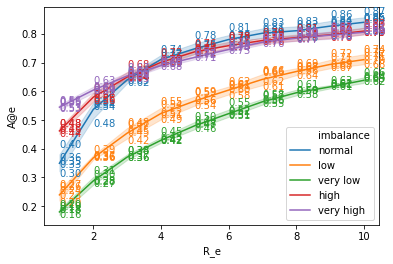

In [135]:
#ax = sns.lineplot(x="R_e", y="A@e", hue="imbalance", data=best_merged_df,  markers=True, palette=palette)
print(best_merged_df.head())
line_plot_write_imb_values(best_merged_df)

In [146]:
best_merged_df_sph = merged_df[(merged_df["gini"] == -1) & (merged_df["p value"] == -1) & (merged_df["Run"] == best_run) & (merged_df["Method"]=="SPH")]
best_merged_df_sph

,R_e,A@e,Method,gini,p value,Run,SPH Executed,info loss,SPH A@1,RF+B A@1,CPI A@1,Avg Acc SPH+CPI,imbalance
1000,1,0.276667,SPH,-1.0,-1.0,3.0,10.0,0.25,NaN,NaN,NaN,NaN,low
1001,2,0.366667,SPH,-1.0,-1.0,3.0,10.0,0.25,NaN,NaN,NaN,NaN,low
1002,3,0.470000,SPH,-1.0,-1.0,3.0,10.0,0.25,NaN,NaN,NaN,NaN,low
1003,4,0.523333,SPH,-1.0,-1.0,3.0,10.0,0.25,NaN,NaN,NaN,NaN,low
1004,5,0.553333,SPH,-1.0,-1.0,3.0,10.0,0.25,NaN,NaN,NaN,NaN,low
1005,6,0.590000,SPH,-1.0,-1.0,3.0,10.0,0.25,NaN,NaN,NaN,NaN,low
1006,7,0.626667,SPH,-1.0,-1.0,3.0,10.0,0.25,NaN,NaN,NaN,NaN,low
1007,8,0.663333,SPH,-1.0,-1.0,3.0,10.0,0.25,NaN,NaN,NaN,NaN,low
1008,9,0.690000,SPH,-1.0,-1.0,3.0,10.0,0.25,NaN,NaN,NaN,NaN,low
1009,10,0.703333,SPH,-1.0,-1.0,3.0,10.0,0.25,NaN,NaN,NaN,NaN,low


Accuracy für verschiedene imbalance degrees für SPH. Hier sehen wir, dass die Accuracy sehr ähnlich ist zu SPH+CPI, aber auch daran liegt, dass wir die PArameter von CPI nicht optimieren.

['low' 'normal' 'very low' 'high' 'very high']
5
['low', 'normal', 'very low', 'high', 'very high']
Categories (5, object): ['normal' < 'low' < 'very low' < 'high' < 'very high']


<ipython-input-130-f82b6e409d45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["imbalance"] = pd.Categorical(df["imbalance"],


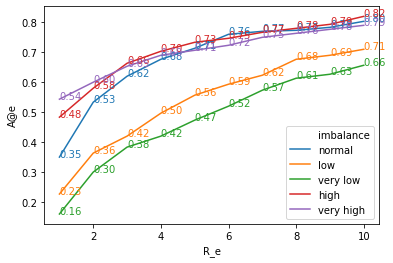

In [140]:
line_plot_write_imb_values(best_merged_df_sph)

['low' 'normal' 'very low' 'high' 'very high']
5
['low', 'normal', 'very low', 'high', 'very high']
Categories (5, object): ['normal' < 'low' < 'very low' < 'high' < 'very high']


<ipython-input-82-f82b6e409d45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["imbalance"] = pd.Categorical(df["imbalance"],


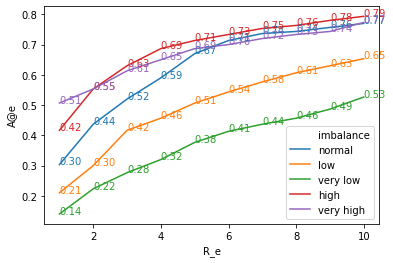

In [112]:
best_merged_df_sph_Rf = merged_df[(merged_df["gini"] == -1) & (merged_df["p value"] == -1) & (merged_df["Run"] == best_run) & (merged_df["Method"]=="RF+B")]
best_merged_df_sph_Rf
line_plot_write_imb_values(best_merged_df_sph_Rf)

In [130]:
def line_plot_write_imb_values(df):
    print(df["imbalance"].unique())
    df["imbalance"] = pd.Categorical(df["imbalance"], 
                      categories=["normal","low","very low","high", "very high"],
                      ordered=True)
    palette = sns.color_palette()[0:len(df["imbalance"].unique())]
    print(len(palette))
    print(df["imbalance"].unique())
    df = df.sort_values("imbalance")
    color_per_label = {x:c for x,c in zip(df["imbalance"].unique(), palette)}
    ax = sns.lineplot(x="R_e", y="A@e", hue="imbalance", data=df, markers=True, palette=palette)

    for item, color in zip(df.groupby('imbalance'),palette):
        #item[1] is a grouped data frame
        for x,y,imb in item[1][['R_e','A@e','imbalance']].values:
            ax.text(x,y,f'{y:.2f}', color=color_per_label[imb])

## Accuracy für jeden imbalance degree optimiert

Jetzt schauen wir uns die Accuracy für die verschiedenen imbalance degrees an, wenn wir jeweils die Parameter für jeden einzeln optimieren

In [143]:
best_result_each_degree = pd.DataFrame()

frames = [very_low_imb_df, low_imb_df, normal_imb_df, high_imb_df, very_high_imb_df]
for frame in frames:    
    best_result = frame[frame["Avg Acc SPH+CPI"] == frame["Avg Acc SPH+CPI"].max()]
    #print(best_result)
    best_gini = best_result["gini"].values[0]
    best_p = best_result["p value"].values[0]
    best_run = best_result["Run"].values[0]
    print(f"best run for imb degree {frame['imbalance'].values[0]} is: {best_run}")
    # best result for SPH+CPI
    best_ta_methods = frame[((frame["gini"] ==best_gini) & (frame["Run"] == best_run) & (frame["p value"] == best_p))]
    best_result_each_degree = pd.concat([best_result_each_degree, best_ta_methods])
    
best_result_each_degree

best run for imb degree very low is: 4.0
best run for imb degree low is: 1.0
best run for imb degree normal is: 1.0
best run for imb degree high is: 1.0
best run for imb degree very high is: 3.0


,R_e,A@e,Method,gini,p value,Run,SPH Executed,info loss,SPH A@1,RF+B A@1,CPI A@1,Avg Acc SPH+CPI,imbalance
1730,1,0.196667,Tailored Approach,0.30,0.90,4.0,9.0,0.25,0.196667,0.110000,0.096667,0.482000,very low
1731,2,0.313333,Tailored Approach,0.30,0.90,4.0,9.0,0.25,0.196667,0.110000,0.096667,0.482000,very low
1732,3,0.383333,Tailored Approach,0.30,0.90,4.0,9.0,0.25,0.196667,0.110000,0.096667,0.482000,very low
1733,4,0.450000,Tailored Approach,0.30,0.90,4.0,9.0,0.25,0.196667,0.110000,0.096667,0.482000,very low
1734,5,0.503333,Tailored Approach,0.30,0.90,4.0,9.0,0.25,0.196667,0.110000,0.096667,0.482000,very low
1735,6,0.550000,Tailored Approach,0.30,0.90,4.0,9.0,0.25,0.196667,0.110000,0.096667,0.482000,very low
1736,7,0.580000,Tailored Approach,0.30,0.90,4.0,9.0,0.25,0.196667,0.110000,0.096667,0.482000,very low
1737,8,0.593333,Tailored Approach,0.30,0.90,4.0,9.0,0.25,0.196667,0.110000,0.096667,0.482000,very low
1738,9,0.613333,Tailored Approach,0.30,0.90,4.0,9.0,0.25,0.196667,0.110000,0.096667,0.482000,very low
1739,10,0.636667,Tailored Approach,0.30,0.90,4.0,9.0,0.25,0.196667,0.110000,0.096667,0.482000,very low


['very low' 'low' 'normal' 'high' 'very high']
5
['very low', 'low', 'normal', 'high', 'very high']
Categories (5, object): ['normal' < 'low' < 'very low' < 'high' < 'very high']


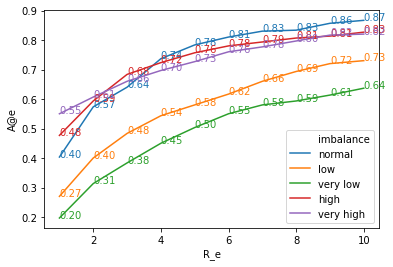

In [144]:
line_plot_write_imb_values(best_result_each_degree)